Lambda School Data Science

*Unit 4, Sprint 3, Module 1*

---


# Recurrent Neural Networks (RNNs) and Long Short Term Memory (LSTM) (Prepare)

<img src="https://media.giphy.com/media/l2JJu8U8SoHhQEnoQ/giphy.gif" width=480 height=356>
<br></br>
<br></br>

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe Neural Networks used for modeling sequences
- <a href="#p2">Part 2: </a>Apply a LSTM to a text generation problem using Keras

## Overview

> "Yesterday's just a memory - tomorrow is never what it's supposed to be." -- Bob Dylan

Wish you could save [Time In A Bottle](https://www.youtube.com/watch?v=AnWWj6xOleY)? With statistics you can do the next best thing - understand how data varies over time (or any sequential order), and use the order/time dimension predictively.

A sequence is just any enumerated collection - order counts, and repetition is allowed. Python lists are a good elemental example - `[1, 2, 2, -1]` is a valid list, and is different from `[1, 2, -1, 2]`. The data structures we tend to use (e.g. NumPy arrays) are often built on this fundamental structure.

A time series is data where you have not just the order but some actual continuous marker for where they lie "in time" - this could be a date, a timestamp, [Unix time](https://en.wikipedia.org/wiki/Unix_time), or something else. All time series are also sequences, and for some techniques you may just consider their order and not "how far apart" the entries are (if you have particularly consistent data collected at regular intervals it may not matter).

# Neural Networks for Sequences (Learn)

## Overview

There's plenty more to "traditional" time series, but the latest and greatest technique for sequence data is recurrent neural networks. A recurrence relation in math is an equation that uses recursion to define a sequence - a famous example is the Fibonacci numbers:

$F_n = F_{n-1} + F_{n-2}$

For formal math you also need a base case $F_0=1, F_1=1$, and then the rest builds from there. But for neural networks what we're really talking about are loops:

![Recurrent neural network](https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg)

The hidden layers have edges (output) going back to their own input - this loop means that for any time `t` the training is at least partly based on the output from time `t-1`. The entire network is being represented on the left, and you can unfold the network explicitly to see how it behaves at any given `t`.

Different units can have this "loop", but a particularly successful one is the long short-term memory unit (LSTM):

![Long short-term memory unit](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Long_Short-Term_Memory.svg/1024px-Long_Short-Term_Memory.svg.png)

There's a lot going on here - in a nutshell, the calculus still works out and backpropagation can still be implemented. The advantage (ane namesake) of LSTM is that it can generally put more weight on recent (short-term) events while not completely losing older (long-term) information.

After enough iterations, a typical neural network will start calculating prior gradients that are so small they effectively become zero - this is the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem), and is what RNN with LSTM addresses. Pay special attention to the $c_t$ parameters and how they pass through the unit to get an intuition for how this problem is solved.

So why are these cool? One particularly compelling application is actually not time series but language modeling - language is inherently ordered data (letters/words go one after another, and the order *matters*). [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) is a famous and worth reading blog post on this topic.

For our purposes, let's use TensorFlow and Keras to train RNNs with natural language. Resources:

- https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py
- https://keras.io/layers/recurrent/#lstm
- http://adventuresinmachinelearning.com/keras-lstm-tutorial/

Note that `tensorflow.contrib` [also has an implementation of RNN/LSTM](https://www.tensorflow.org/tutorials/sequences/recurrent).

## Follow Along

Sequences come in many shapes and forms from stock prices to text. We'll focus on text, because modeling text as a sequence is a strength of Neural Networks. Let's start with a simple classification task using a TensorFlow tutorial. 

### RNN/LSTM Sentiment Classification with Keras

In [ ]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, SimpleRNN, LSTM
from tensorflow.keras.datasets import imdb

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Set top N words and batch_size
max_features = 20000
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

# Map for readable classnames
class_names = ["Negative", "Positive"]

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

Reviews in the IMDB dataset have been encoded as a sequence of integers. Luckily the dataset also contains an index for converting the reviews back into human readable form.

In [ ]:
# Get the word index from the dataset
word_index = imdb.get_word_index()

# Ensure that "special" words are mapped into human readable terms 
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2

# Perform reverse word lookup and make it callable
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [ ]:
# Concatonate test and training datasets
allreviews = np.concatenate((x_train, x_test), axis=0)

# Review lengths across test and training whole datasets
print("Maximum review length: {}".format(len(max((allreviews), key=len))))
print("Minimum review length: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Mean review length: {}".format(np.mean(result)))

# Print a review and it's class as stored in the dataset. Replace the number
# to select a different review.
print("")
print("Machine readable Review")
print("  Review Text: " + str(x_train[30]))
print("  Review Sentiment: " + str(y_train[30]))

# Print a review and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Review")
print("  Review Text: " + decode_review(x_train[30]))
print("  Review Sentiment: " + class_names[y_train[30]])

Maximum review length: 2494
Minimum review length: 7
Mean review length: 234.75892

Machine readable Review
  Review Text: [1, 13, 1059, 14, 33, 6, 2181, 2824, 32, 13, 70, 135, 9, 51, 4, 609, 14, 20, 299, 46, 44, 17, 9287, 17, 4111, 2914, 886, 4, 229, 18, 6624, 45, 1162, 724, 231, 4, 3638, 227, 7, 281, 5, 60, 48, 25, 81, 563, 129, 1224, 11, 4, 519, 4, 22, 9, 131, 38, 1162, 15, 12, 218, 60, 163, 10, 10, 4, 114, 2290, 4660, 2243, 1230, 9771, 269, 8, 607, 6, 4660, 63, 1367, 6, 3732, 2, 4, 3732, 266, 103, 9771, 8, 79, 68, 2, 145, 9771, 2497, 98, 18, 2, 5, 732, 46, 8, 570, 98, 10, 10, 198, 44, 32, 4, 65, 50, 9, 4, 360, 9, 120, 4, 350, 2, 7, 2435, 1181, 2, 67, 2, 5, 2, 5, 2886, 4331, 206, 844, 33, 31, 213, 9771, 2, 6, 10926, 15977, 5, 3193, 1860, 19, 6, 3732, 1544, 23, 350, 7, 12, 422, 198, 208, 1230, 9771, 3193, 1860, 6, 232, 23, 350, 7, 35, 15977, 387, 15, 30, 129, 3619, 18, 14, 3931, 78, 22]
  Review Sentiment: 0

Human Readable Review
  Review Text: <START> i caught this at a test screen

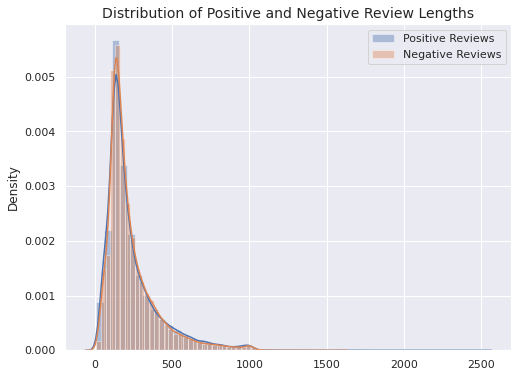

In [ ]:
# Get the lengths for positive and negative reviews
all_labels = np.concatenate([y_train, y_test])
positive = np.array(result)[all_labels==1]
negative = np.array(result)[all_labels==0]

plt.figure(figsize=(8,6))
sns.distplot(positive, label='Positive Reviews', hist=True)
sns.distplot(negative, label='Negative Reviews', hist=True)
plt.title('Distribution of Positive and Negative Review Lengths', fontsize=14)
plt.legend();

In [ ]:
# If you want to pad the end of the sequences you can set padding='post'.
maxlen = 300

print('Pad Sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad Sequences (samples x time)
x_train shape:  (25000, 300)
x_test shape:  (25000, 300)


In [ ]:
x_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     1,    14,    22,    16,    43,   530,   973,  1622,
        1385,    65,   458,  4468,    66,  3941,     4,   173,    36,
         256,     5,    25,   100,    43,   838,   112,    50,   670,
           2,     9,    35,   480,   284,     5,   150,     4,   172,
         112,   167,     2,   336,   385,    39,     4,   172,  4536,
        1111,    17,

Let's get a baseline performance for Multi-Layer Perceptron

In [ ]:
mlp = Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learned during the training process.
mlp.add(Embedding(max_features, 64, input_length=maxlen))

# Dense layer with 128 neurons and relu activation
mlp.add(Dense(128, activation='relu'))

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
mlp.add(Dropout(0.25))

# Final layer is dense single node. A sigmoid activation function determines 
# the output from this node - a value between 0 and 1. Closer to 0 indicates 
# a negative review. Closer to 1 indicates a positive review.
mlp.add(Dense(1, activation='sigmoid'))

# Compile the model
mlp.compile(loss='binary_crossentropy',
            optimizer='adam', 
            metrics=['accuracy'])

mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 64)           1280000   
_________________________________________________________________
dense (Dense)                (None, 300, 128)          8320      
_________________________________________________________________
dropout (Dropout)            (None, 300, 128)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 300, 1)            129       
Total params: 1,288,449
Trainable params: 1,288,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_history = mlp.fit(x_train, y_train,
                      batch_size=batch_size, 
                      epochs=5, 
                      validation_data=(x_test,y_test))

Epoch 1/5
782/782 [==============================] - 17s 18ms/step - loss: 0.6883 - accuracy: 0.5256 - val_loss: 0.6855 - val_accuracy: 0.5346
Epoch 2/5
782/782 [==============================] - 14s 18ms/step - loss: 0.6825 - accuracy: 0.5374 - val_loss: 0.6858 - val_accuracy: 0.5356
Epoch 3/5
782/782 [==============================] - 14s 18ms/step - loss: 0.6816 - accuracy: 0.5379 - val_loss: 0.6859 - val_accuracy: 0.5356
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.6812 - accuracy: 0.5382 - val_loss: 0.6861 - val_accuracy: 0.5356
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.6812 - accuracy: 0.5407 - val_loss: 0.6862 - val_accuracy: 0.5355


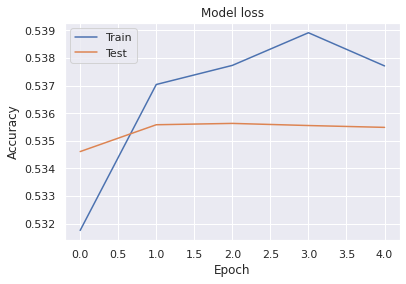

In [ ]:
# Plot training & validation accuracy values
plt.plot(mlp_history.history['accuracy'])
plt.plot(mlp_history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

Let's try training an LSTM.

In [ ]:
from tensorflow.keras.layers import Bidirectional

# Define LSTM Architecture
lstm = Sequential()
lstm.add(Embedding(max_features, 64, input_length=maxlen))
lstm.add(LSTM(128))

# If you want to add Bidirectional LSTM
# lstm.add(Bidirectional(LSTM(128)))

# If you want to stack LSTM layers (need to return sequences i.e. hiddent state)
# lstm.add(LSTM(128, return_sequences=True))

lstm.add(Dropout(0.25))
lstm.add(Dense(1, activation='sigmoid'))

lstm.compile(loss='binary_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 64)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               197632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 1,477,889
Trainable params: 1,477,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_history = lstm.fit(x_train, y_train,
                        batch_size=batch_size, 
                        epochs=5, 
                        validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 42s 50ms/step - loss: 0.5508 - accuracy: 0.6975 - val_loss: 0.3582 - val_accuracy: 0.8470
Epoch 2/5
782/782 [==============================] - 38s 48ms/step - loss: 0.2451 - accuracy: 0.9086 - val_loss: 0.3167 - val_accuracy: 0.8732
Epoch 3/5
782/782 [==============================] - 37s 48ms/step - loss: 0.1524 - accuracy: 0.9458 - val_loss: 0.3626 - val_accuracy: 0.8602
Epoch 4/5
782/782 [==============================] - 37s 48ms/step - loss: 0.0976 - accuracy: 0.9664 - val_loss: 0.4258 - val_accuracy: 0.8546
Epoch 5/5
782/782 [==============================] - 37s 47ms/step - loss: 0.0798 - accuracy: 0.9723 - val_loss: 0.4447 - val_accuracy: 0.8236


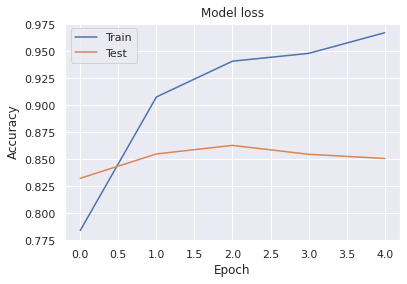

In [ ]:
# Plot training & validation accuracy values
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

## Evaluate model with test data and view classification results

In [ ]:
from sklearn.metrics import classification_report

# Get Model Predictions for test data
predicted_classes = (lstm.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

    Negative       0.80      0.86      0.83     12500
    Positive       0.85      0.79      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000



## Review some Incorrect Predictions

In [ ]:
predicted_classes_reshaped = np.reshape(predicted_classes, 25000)
incorrect = np.nonzero(predicted_classes_reshaped != y_test)[0]

# We select the first 10 incorrectly classified reviews
for j, incorrect in enumerate(incorrect[0:3]):
    
    predicted = class_names[predicted_classes_reshaped[incorrect]]
    actual = class_names[y_test[incorrect]]
    human_readable_review = decode_review(x_test[incorrect])
    
    print("Incorrectly classified Test Review ["+ str(j+1) +"]") 
    print("Test Review #" + str(incorrect)  + ": Predicted ["+ predicted + "] Actual ["+ actual + "]")
    print("Test Review Text: " + human_readable_review.replace("<PAD> ", ""))
    print("")

Incorrectly classified Test Review [1]
Test Review #2: Predicted [Negative] Actual [Positive]
Test Review Text: alive simultaneously while <UNKNOWN> for his part is depicted as a droll white bearded guy in the clouds who looks like he'd rather be taking a nap when <UNKNOWN> sends them a tree like god who regards them the frogs decide that this is no improvement and demand a different king irritated <UNKNOWN> sends them a <UNKNOWN> br br delighted with this formidable looking new king who towers above them the frogs welcome him with a <UNKNOWN> of <UNKNOWN> dressed <UNKNOWN> the mayor steps forward to hand him the key to the <UNKNOWN> as newsreel cameras record the event to everyone's horror the <UNKNOWN> promptly eats the mayor and then goes on a merry rampage <UNKNOWN> citizens at random a title card <UNKNOWN> reads news of the king's appetite throughout the kingdom when the now terrified frogs once more <UNKNOWN> <UNKNOWN> for help he loses his temper and showers their community with

## Run Your Own Text Against the Trained Model

In [ ]:
# Write your own review
review = "this movie was great I would definitely watch it again in theaters"

# Encode review (replace word with integers)
tmp = []
for word in review.split(" "):
  if word in word_index:
    tmp.append(word_index[word])
  else:
    tmp.append(2)  # 2 represents the "<UNKNOWN>" token

# Ensure review is 300 words long (by padding or truncating)
tmp_padded = sequence.pad_sequences([tmp], maxlen=maxlen) 

# Run your processed review against the trained model
rawprediction = lstm.predict(np.array([tmp_padded][0]))[0][0]
prediction = int(round(rawprediction))

# Test the model and print the result
print("Review: " + review)
print("Padded Sequence: " + str(tmp_padded))
print("Prediction Probability: " + str(rawprediction))
print("Predicted Class: " + class_names[prediction])

Review: this movie was great I would definitely watch it again in theaters
Padded Sequence: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   

## Challenge

You will be expected to use an Keras LSTM for a classicification task on the *Sprint Challenge*. 

# LSTM Text generation with Keras (Learn)

## Overview

What else can we do with LSTMs? Since we're analyzing the *sequence*, we can do more than classify - we can *generate* text. I'ved pulled some news stories using [newspaper](https://github.com/codelucas/newspaper/).

This example is drawn from the Keras [documentation](https://keras.io/examples/lstm_text_generation/).

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import random
import sys
from glob import glob

In [ ]:
!unzip bbc.zip

Archive:  bbc.zip
   creating: bbc/business/
  inflating: bbc/business/001.txt    
  inflating: bbc/business/002.txt    
  inflating: bbc/business/003.txt    
  inflating: bbc/business/004.txt    
  inflating: bbc/business/005.txt    
  inflating: bbc/business/006.txt    
  inflating: bbc/business/007.txt    
  inflating: bbc/business/008.txt    
  inflating: bbc/business/009.txt    
  inflating: bbc/business/010.txt    
  inflating: bbc/business/011.txt    
  inflating: bbc/business/012.txt    
  inflating: bbc/business/013.txt    
  inflating: bbc/business/014.txt    
  inflating: bbc/business/015.txt    
  inflating: bbc/business/016.txt    
  inflating: bbc/business/017.txt    
  inflating: bbc/business/018.txt    
  inflating: bbc/business/019.txt    
  inflating: bbc/business/020.txt    
  inflating: bbc/business/021.txt    
  inflating: bbc/business/022.txt    
  inflating: bbc/business/023.txt    
  inflating: bbc/business/024.txt    
  inflating: bbc/business/025.txt    
  inf

In [ ]:
# Get all .txt files from all subdirectories
all_files = glob('./bbc/*/*.txt')
all_files[:10]

['./bbc/entertainment/246.txt',
 './bbc/entertainment/342.txt',
 './bbc/entertainment/207.txt',
 './bbc/entertainment/147.txt',
 './bbc/entertainment/352.txt',
 './bbc/entertainment/182.txt',
 './bbc/entertainment/081.txt',
 './bbc/entertainment/053.txt',
 './bbc/entertainment/131.txt',
 './bbc/entertainment/178.txt']

In [ ]:
# Read in Data
data = []

for file in all_files:
    if file[-3:] == 'txt':
        with open(f'{file}', 'r', encoding="utf8", errors='ignore') as f:
            data.append(f.read())

print(f'Number of Documents: ', len(data))
data[100]

Number of Documents:  2225


'Baby becomes new Oscar favourite\n\nClint Eastwood\'s boxing drama Million Dollar Baby has become the new favourite to win best picture at the Oscars on Sunday.\n\nAccording to pundits, the film has overtaken previous favourite The Aviator, with Eastwood also tipped to take the best director award. Its star Hilary Swank is favourite to win best actress while Jamie Foxx is tipped to win best actor for Ray. Million Dollar Baby has seven nominations while The Aviator has 11. The Aviator has scored a best director nomination for Martin Scorsese, who has never won an Oscar, while stars Leonardo DiCaprio and Cate Blanchett are both nominated for acting Oscars.\n\n"If you look at the Oscars race, The Aviator should be ahead," said awards pundit Tom O\'Neil. "It is the most nominated film, and the most nominated movie has won best picture 18 times out of the last 20 years. "But the reality is Million Dollar Baby is the dark horse. People feel emotionally about it and Clint is a beloved Hollyw

In [ ]:
list('baby')

['b', 'a', 'b', 'y']

In [ ]:
# Encode Data as Chars

# Gather all text 
# Why? 1. See all possible characters 2. For training / splitting later
text = ' '.join(data)

# Get the Unique Characters
chars = list(set(text))

# Create Lookup Tables
char_int = {c:i for i, c in enumerate(chars)}
int_char = {i:c for i, c in enumerate(chars)}

print('Number of Unique Characters: ', len(chars))

Number of Unique Characters:  88


In [ ]:
chars

[']',
 '"',
 'L',
 '@',
 'M',
 'b',
 'v',
 'H',
 '*',
 'r',
 '%',
 'g',
 '4',
 ')',
 'd',
 'o',
 'G',
 '-',
 'V',
 '`',
 'D',
 '$',
 'Q',
 't',
 '3',
 ';',
 'z',
 'u',
 'q',
 'N',
 'e',
 '(',
 'S',
 'B',
 '0',
 '#',
 'i',
 'x',
 '.',
 'C',
 '£',
 '&',
 'X',
 'K',
 '6',
 'A',
 'c',
 'f',
 'I',
 ' ',
 '1',
 '!',
 '+',
 'E',
 'm',
 'P',
 ':',
 'h',
 'j',
 '[',
 'p',
 'w',
 ',',
 'k',
 'a',
 '9',
 'Z',
 'O',
 'W',
 '5',
 '?',
 '/',
 'F',
 '=',
 'n',
 '2',
 'T',
 '8',
 'J',
 '\n',
 'l',
 'U',
 "'",
 's',
 'Y',
 'y',
 '7',
 'R']

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 300)

df = pd.DataFrame(data, columns=['Raw Text'])
print(df.shape)
df.sample(3)

(2225, 1)


,Raw Text
962,"Hingis hints at playing comeback\n\nMartina Hingis has admitted that she might consider a competitive return to tennis if an appearance in Thailand later this month goes well.\n\nThe former world number one will play at the Volvo Women's Open in Pattaya, which starts on 31 January, as part of he..."
105,"Da Vinci film to star Tom Hanks\n\nActor Tom Hanks and director Ron Howard are reuniting for The Da Vinci Code, an adaptation of the international best-selling novel by Dan Brown.\n\nDistributor Sony Pictures said production will begin next year, with a planned release in May 2006. Hanks will pl..."
1311,"O'Sullivan quick to hail Italians\n\nIreland coach Eddie O'Sullivan heaped praise on Italy after seeing his side stutter to a 28-17 victory in Rome.\n\n""It was a hell of a tough game,"" said O'Sullivan. ""We struggled in the first half because we hadn't the football. ""Italy played really well. The..."


In [ ]:
import re

# Clean up text (i.e. remove punctuation, maybe numbers, and punctuation except for ., !, and ?
df['Clean Text'] = df['Raw Text'].apply(lambda x: re.sub(r"[^A-Za-z .!?,]+", ' ', x))

# Remove any extra spaces that were created from cleaning operation above
df['Clean Text'] = df['Clean Text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df.sample(3)

,Raw Text,Clean Text
824,"VW considers opening Indian plant\n\nVolkswagen is considering building a car factory in India, but said it had yet to make a final decision.\n\nThe German giant said it was studying the possibility of opening an assembly plant in the country, but that it remained only a ""potential"" idea. Its co...","vw considers opening indian plant volkswagen is considering building a car factory in india, but said it had yet to make a final decision. the german giant said it was studying the possibility of opening an assembly plant in the country, but that it remained only a potential idea. its comments c..."
2197,"Muslims discuss election concerns\n\nIssues that Muslims should be considering before voting in the next general election are to be debated by UK community representatives.\n\nThe event is being held by the Muslim Association of Britain (MAB), which believes Muslim voters could influence the res...","muslims discuss election concerns issues that muslims should be considering before voting in the next general election are to be debated by uk community representatives. the event is being held by the muslim association of britain mab , which believes muslim voters could influence the result in ..."
17,"X Factor show gets second series\n\nTV talent show The X Factor is to return for a second series after being recommissioned by ITV.\n\nJudges Simon Cowell, Louis Walsh and Sharon Osbourne are in discussions to sign up for the new series. The final of the first series will take place on 11 Decemb...","x factor show gets second series tv talent show the x factor is to return for a second series after being recommissioned by itv. judges simon cowell, louis walsh and sharon osbourne are in discussions to sign up for the new series. the final of the first series will take place on december. last ..."


In [ ]:
# Encode Data as Chars

# Gather all text 
# Why? 1. See all possible characters 2. For training / splitting later
text = ' '.join(df['Clean Text'].values)

# Get the Unique Characters
chars = list(set(text))

# Create Lookup Tables
char_int = {c:i for i, c in enumerate(chars)}
int_char = {i:c for i, c in enumerate(chars)}

print('Number of Unique Characters: ', len(chars))

Number of Unique Characters:  31


In [ ]:
chars

['c',
 't',
 ' ',
 'z',
 'u',
 'b',
 'q',
 '?',
 '!',
 'e',
 'v',
 'r',
 'm',
 'g',
 'h',
 'n',
 'j',
 'i',
 'p',
 'x',
 'w',
 '.',
 ',',
 'k',
 'd',
 'o',
 'a',
 'l',
 's',
 'y',
 'f']

In [ ]:
# Create the sequence data
maxlen = 40
step = 5

encoded = [char_int[c] for c in text]
sequences = [] # Each element is 40 chars long
next_char = [] # One element for each sequence

for i in range(0, len(encoded) - maxlen, step):
    sequences.append(encoded[i : i + maxlen])
    next_char.append(encoded[i + maxlen])
    
print('Number of Sequences: ', len(sequences))

Number of Sequences:  987715


In [ ]:
# First sequence
text[0:40]

'singer sizzla jailed for swearing reggae'

In [ ]:
# First label
text[41]

's'

In [ ]:
# Second sequence
text[5:45]

'r sizzla jailed for swearing reggae star'

In [ ]:
# Second label
text[46]

's'

In [ ]:
len(encoded)

4938614

In [ ]:
sequences[0]

[28,
 17,
 15,
 13,
 9,
 11,
 2,
 28,
 17,
 3,
 3,
 27,
 26,
 2,
 16,
 26,
 17,
 27,
 9,
 24,
 2,
 30,
 25,
 11,
 2,
 28,
 20,
 9,
 26,
 11,
 17,
 15,
 13,
 2,
 11,
 9,
 13,
 13,
 26,
 9]

In [ ]:
# Create x & y
x = np.zeros((len(sequences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sequences),len(chars)), dtype=np.bool)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i,t,char] = 1
    y[i, next_char[i]] = 1
    
print(x.shape, y.shape)

(987715, 40, 31) (987715, 31)


In [ ]:
y[0]

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
# Build the model: a single LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

# Compile and view summary
model.compile(loss='categorical_crossentropy', 
              optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 128)               81920     
_________________________________________________________________
dense_5 (Dense)              (None, 31)                3999      
Total params: 85,919
Trainable params: 85,919
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def sample(preds):
    # Helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / 1
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    
    print()
    print('----- Generating text after Epoch: %d' % epoch)
    
    start_index = random.randint(0, len(text) - maxlen - 1)
    
    generated = ''
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)
    
    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_int[char]] = 1
            
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds)
        next_char = int_char[next_index]
        
        sentence = sentence[1:] + next_char
        
        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
# Fit the model
model.fit(x, y,
          batch_size=32,
          epochs=10,
          callbacks=[print_callback])

Epoch 1/10
30867/30867 [==============================] - 133s 4ms/step - loss: 2.1157

----- Generating text after Epoch: 0
----- Generating with seed: "were senior shadow cabinet members david"
were senior shadow cabinet members david be smt in the need taxt burdds the fon a winging taxed . m said the sideray, new itt use, too by like absomate scott her supprofers waaling in the got clongon s cchappeal revelea s cliss the late was led to faburstin, amoration. sulfeed backed any forose usic wantandman maghious thats ton ts not recounted. motwhere illoggusented up a sunjected an inter scotles and nen , we le beinghouse be to sal
Epoch 2/10
30867/30867 [==============================] - 130s 4ms/step - loss: 1.6062

----- Generating text after Epoch: 1
----- Generating with seed: "my. in the budgets that were given immed"
my. in the budgets that were given immedht, weskers a failed the two music to horm of and donum should get i jud mitter were a lick were of the clowes scuttent on amef

## Challenge

You will be expected to use a Keras LSTM to generate text on today's assignment. 

# Review

- <a href="#p1">Part 1: </a>Describe Neural Networks used for modeling sequences
    * Sequence Problems:
        - Time Series (like Stock Prices, Weather, etc.)
        - Text Classification
        - Text Generation
        - And many more! :D
    * LSTMs are generally preferred over RNNs for most problems
    * LSTMs are typically a single hidden layer of LSTM type; although, other architectures are possible.
    * Keras has LSTMs/RNN layer types implemented nicely
- <a href="#p2">Part 2: </a>Apply a LSTM to a text generation problem using Keras
    * Shape of input data is very important
    * Can take a while to train
    * You can use it to write movie scripts. :P 